In [14]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from hyppo.independence import Dcorr

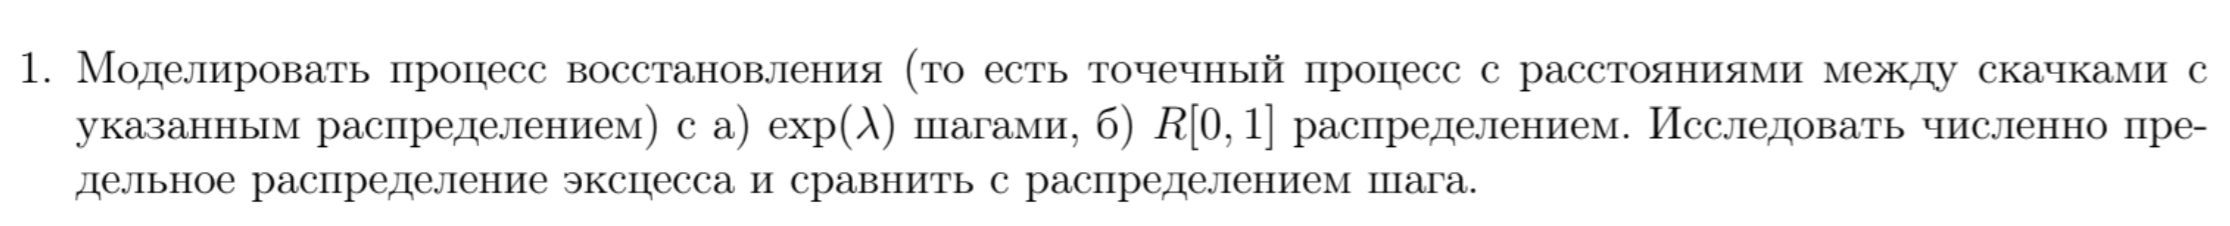

In [2]:
def func(x, trajectory, bins):
    return np.piecewise(x, [((bins[j-1] <= x) & (x < bins[j])) for j in range(1, len(bins))],
                        [trajectory[j-1] for j in range(1, len(bins))] + [trajectory[-1]])

In [83]:
lambda_ = 5
size = 200
data = sts.expon.rvs(scale = 1/lambda_, size = size)

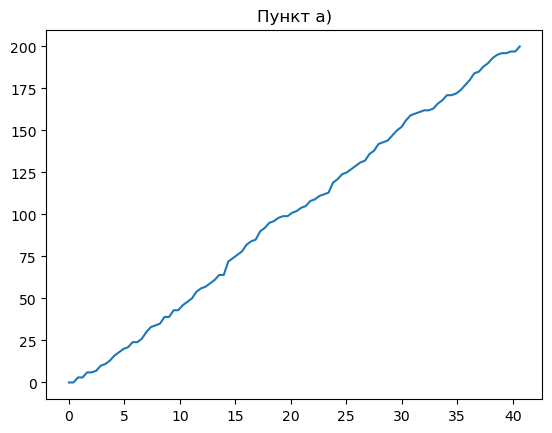

In [84]:
bins = np.insert(np.cumsum(data), 0, 0)
trajectory = np.arange(len(bins))

x = np.linspace(0, np.max(bins), 100)
y = func(x, trajectory, bins)
plt.plot(x, y)
plt.title("Пункт а)")
plt.show()

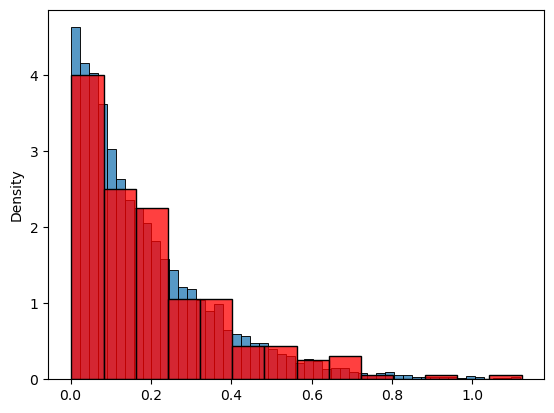

In [85]:
right_corner = np.max(data)
result = np.empty(0)
values = sts.uniform.rvs(loc = 0, scale = right_corner, size = size)
for i in range(size):
    test = data - values[i]
    positive_subarray = test[test >= 0]
    result = np.append(result, positive_subarray)
sb.histplot(result, stat = 'density')
sb.histplot(data,stat = 'density', color = 'red')
plt.show()

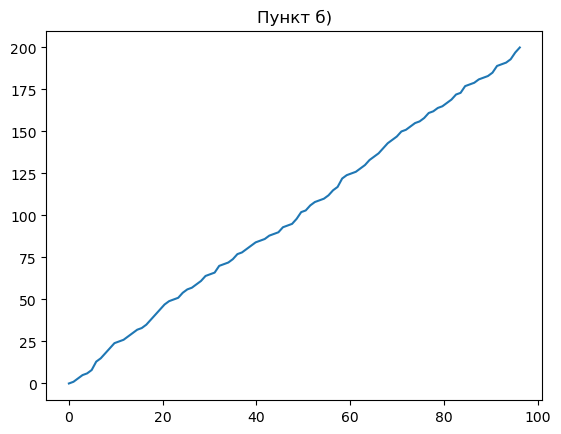

In [86]:
# Пункт б)
data = sts.uniform.rvs(size = size)

bins = np.insert(np.cumsum(data), 0, 0)
trajectory = np.arange(len(bins))

x = np.linspace(0, np.max(bins), 100)
y = func(x, trajectory, bins)
plt.plot(x, y)
plt.title("Пункт б)")
plt.show()

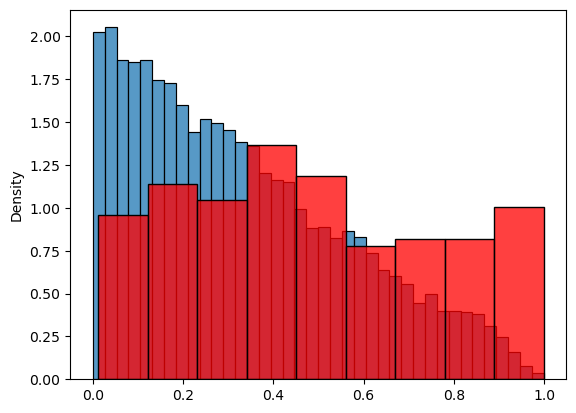

In [87]:
right_corner = np.max(data)
result = np.empty(0)
values = sts.uniform.rvs(loc = 0, scale = right_corner, size = size)
for i in range(size):
    test = data - values[i]
    positive_subarray = test[test >= 0]
    result = np.append(result, positive_subarray)
sb.histplot(result, stat = 'density')
sb.histplot(data,stat = 'density', color = 'red')
plt.show()

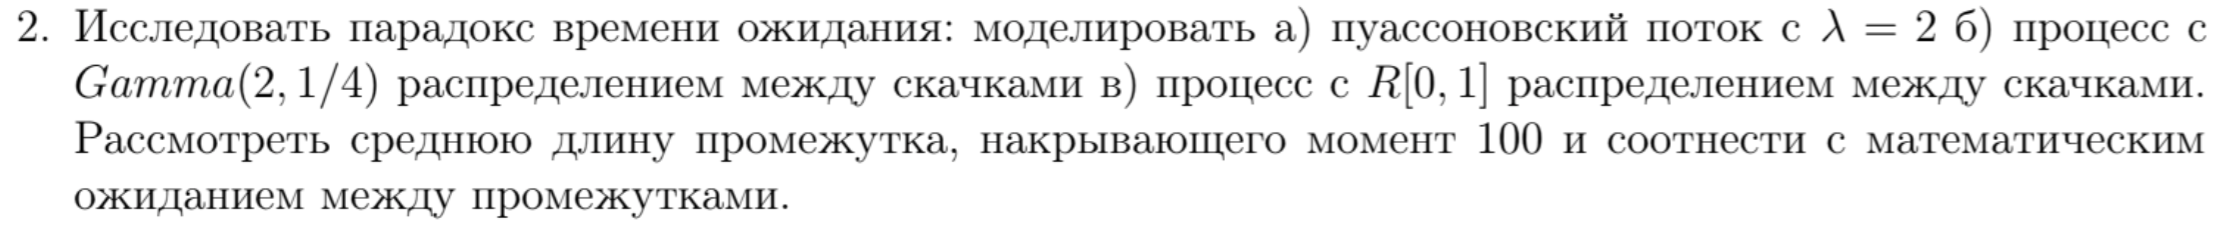

In [91]:
def modeling(mode, size):
    if mode == "a":
        lambda_ = 2
        data = sts.expon.rvs(scale = 1/lambda_, size = size)
    elif mode == "b":
        data = sts.gamma.rvs(2, scale = 1/4, size = size)
    elif mode == "c":
        data = sts.uniform.rvs(size = size)
    right_corner = np.max(data)
    result = np.empty(0)
    values = sts.uniform.rvs(loc = 0, scale = right_corner, size = size)
    for i in range(size):
        test = data - values[i]
        positive_subarray = test[test >= 0]
        result = np.append(result, positive_subarray)
    sb.histplot(result, stat = 'density', label = "Эксцесс")
    sb.histplot(data,stat = 'density', color = 'red', label = "Оригинал")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    bins = np.insert(np.cumsum(data), 0, 0)
    trajectory = np.arange(len(bins))
    x = np.linspace(0, np.max(bins), 100)
    y = func(x, trajectory, bins)
    plt.plot(x, y)
    plt.show()

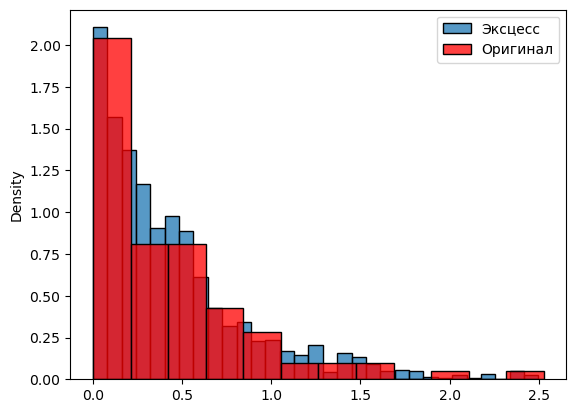

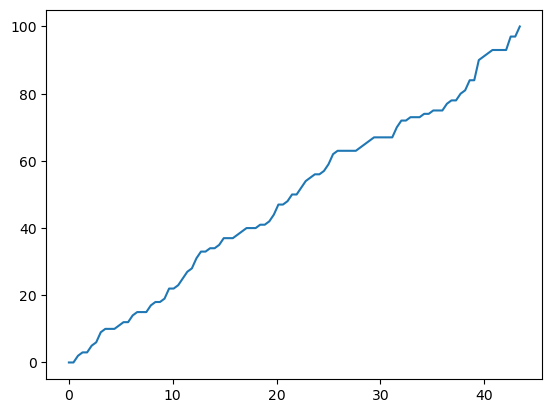

In [96]:
modeling("a", 100)

In [92]:
num_trials = 1000
size = 1000
results = np.zeros(num_trials)
for j in range(num_trials):
    data = sts.expon.rvs(scale = 1/2, size = size)
    bins = np.insert(np.cumsum(data), 0, 0)
    idx = np.digitize(100, bins)
    len_ = bins[idx] - bins[idx-1]
    results[j] += len_
    
print(f"Practical mean: {np.mean(results)}")
print(f"Theoretical mean: {1/2}")

Practical mean: 1.0066997488976885
Theoretical mean: 0.5


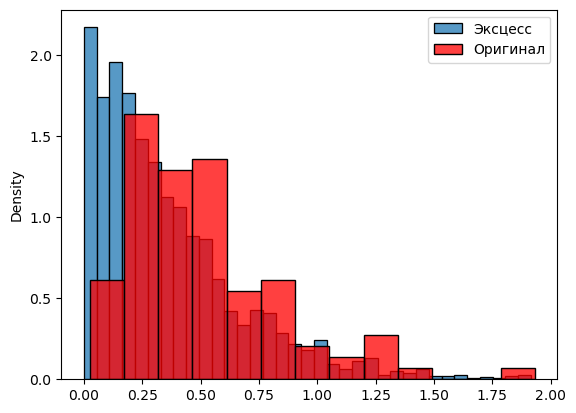

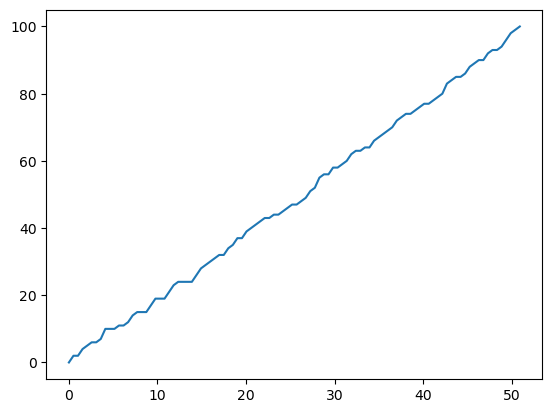

In [97]:
modeling("b", 100)

In [94]:
num_trials = 1000
size = 1000
results = np.zeros(num_trials)
for j in range(num_trials):
    data = sts.gamma.rvs(2, scale = 1/4, size = size)
    bins = np.insert(np.cumsum(data), 0, 0)
    idx = np.digitize(100, bins)
    len_ = bins[idx] - bins[idx-1]
    results[j] += len_

print(f"Practical mean: {np.mean(results)}")
print(f"Theoretical mean: {1/2}")

Practical mean: 0.744485587380444
Theoretical mean: 0.5


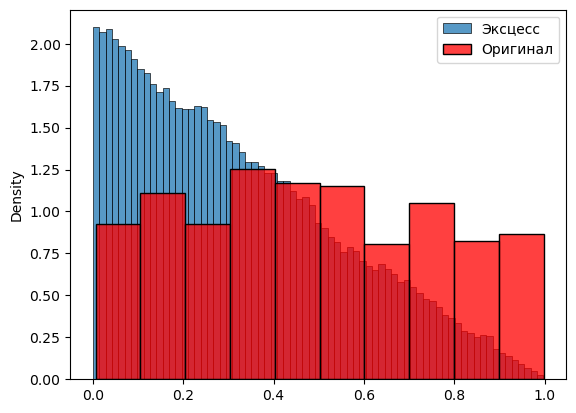

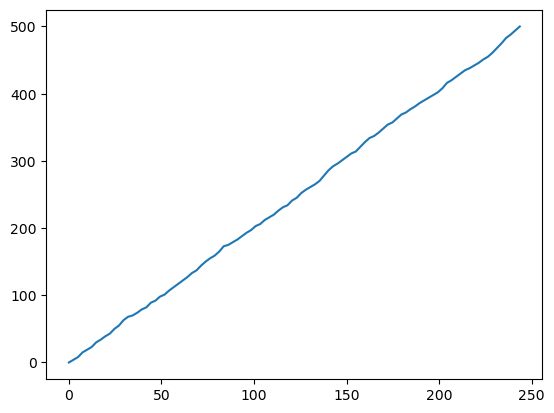

In [102]:
modeling("c", 500)

In [99]:
num_trials = 1000
size = 1000
results = np.zeros(num_trials)
for j in range(num_trials):
    data = sts.uniform.rvs(size = size)
    bins = np.insert(np.cumsum(data), 0, 0)
    idx = np.digitize(100, bins)
    len_ = bins[idx] - bins[idx-1]
    results[j] += len_

print(f"Practical mean: {np.mean(results)}")
print(f"Theoretical mean: {1/2}")

Practical mean: 0.6637551255948749
Theoretical mean: 0.5


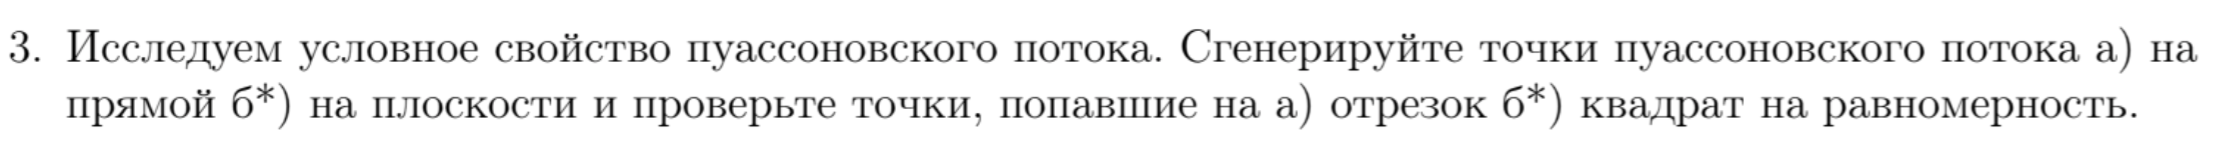

True


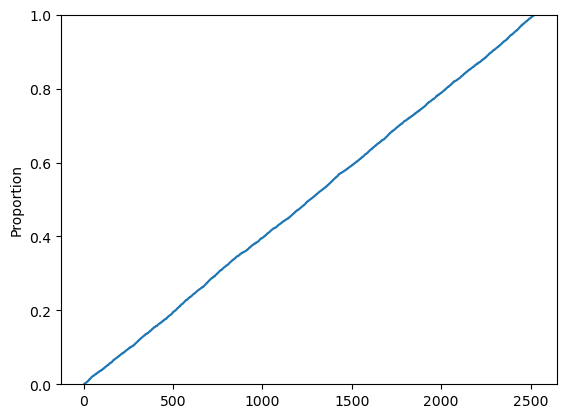

In [2]:
lambda_ = 4
SIZE = 10_000
values = sts.expon.rvs(scale = 1/lambda_, size = SIZE)
result = np.cumsum(values)
sb.ecdfplot(result)
res = sts.kstest(result, sts.uniform(loc=0, scale = np.max(result)).cdf).pvalue
print(res > 0.05)

In [3]:
lambda_ = 1
SIZE = 2_000
RADS_ARR = np.zeros(SIZE)
Y_ARR = sts.uniform.rvs(size = SIZE)
x_test = np.linspace(0,100,1_000)

for j in range(SIZE):
    def F(r: float):
        res = sts.poisson.sf(j, mu = lambda_ * np.pi * r**2)
        return res
    Y = Y_ARR[j]
    def F_inverted(Y):
        Z = np.nonzero(F(x_test) >= Y)
        test = np.min(Z)
        return x_test[test]
    RADS_ARR[j] += F_inverted(Y)

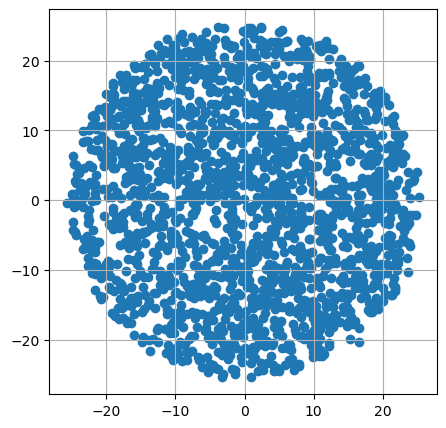

In [32]:
RADS = RADS_ARR
THETA = sts.uniform.rvs(loc = 0, scale = 2*np.pi, size = SIZE)
X = RADS * np.cos(THETA)
Y = RADS * np.sin(THETA)
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(X, Y)
plt.grid()
plt.show()

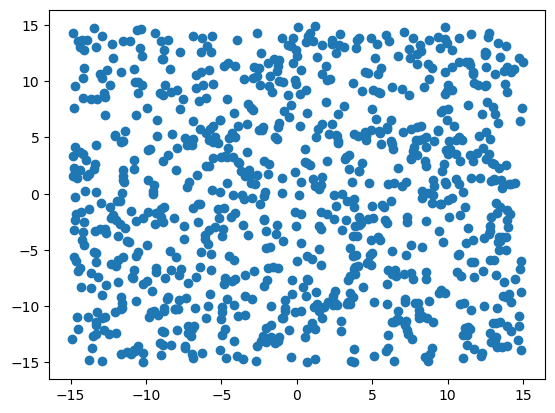

In [6]:
# В качестве анализа равномерности выберем квадрат 15x15.
A = 15
pairs = np.array([(a, b) for a, b in zip(X, Y) if -A <= a <= A and -A <= b <= A])
x, y = pairs[:,0], pairs[:,1]
plt.scatter(x, y)

<Axes: ylabel='Proportion'>

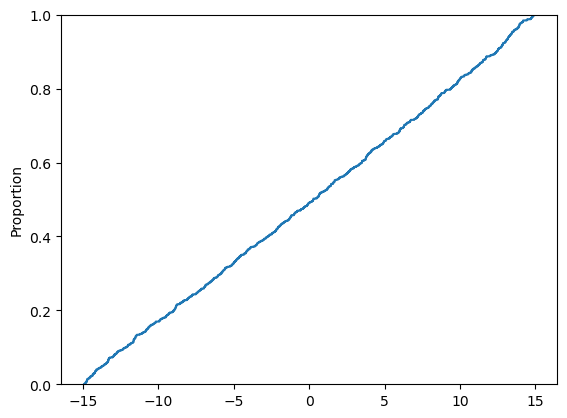

In [7]:
sb.ecdfplot(x)

<Axes: ylabel='Proportion'>

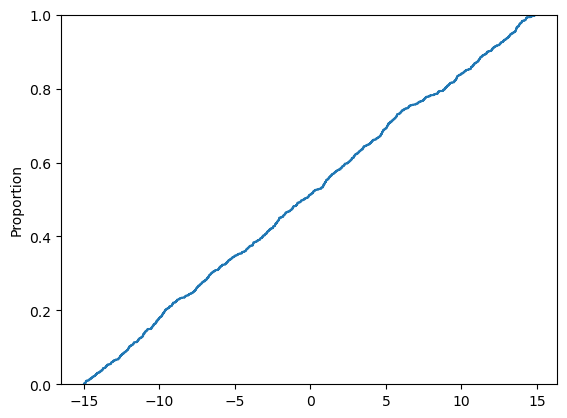

In [8]:
sb.ecdfplot(y)

In [15]:
res1 = sts.kstest(x, sts.uniform(loc=-15, scale=30).cdf).pvalue
res2 = sts.kstest(y, sts.uniform(loc=-15, scale=30).cdf).pvalue
test = Dcorr().test(x, y).pvalue
print(res1>0.05, res2>0.05)
print(test)

True True
0.36893948106122787


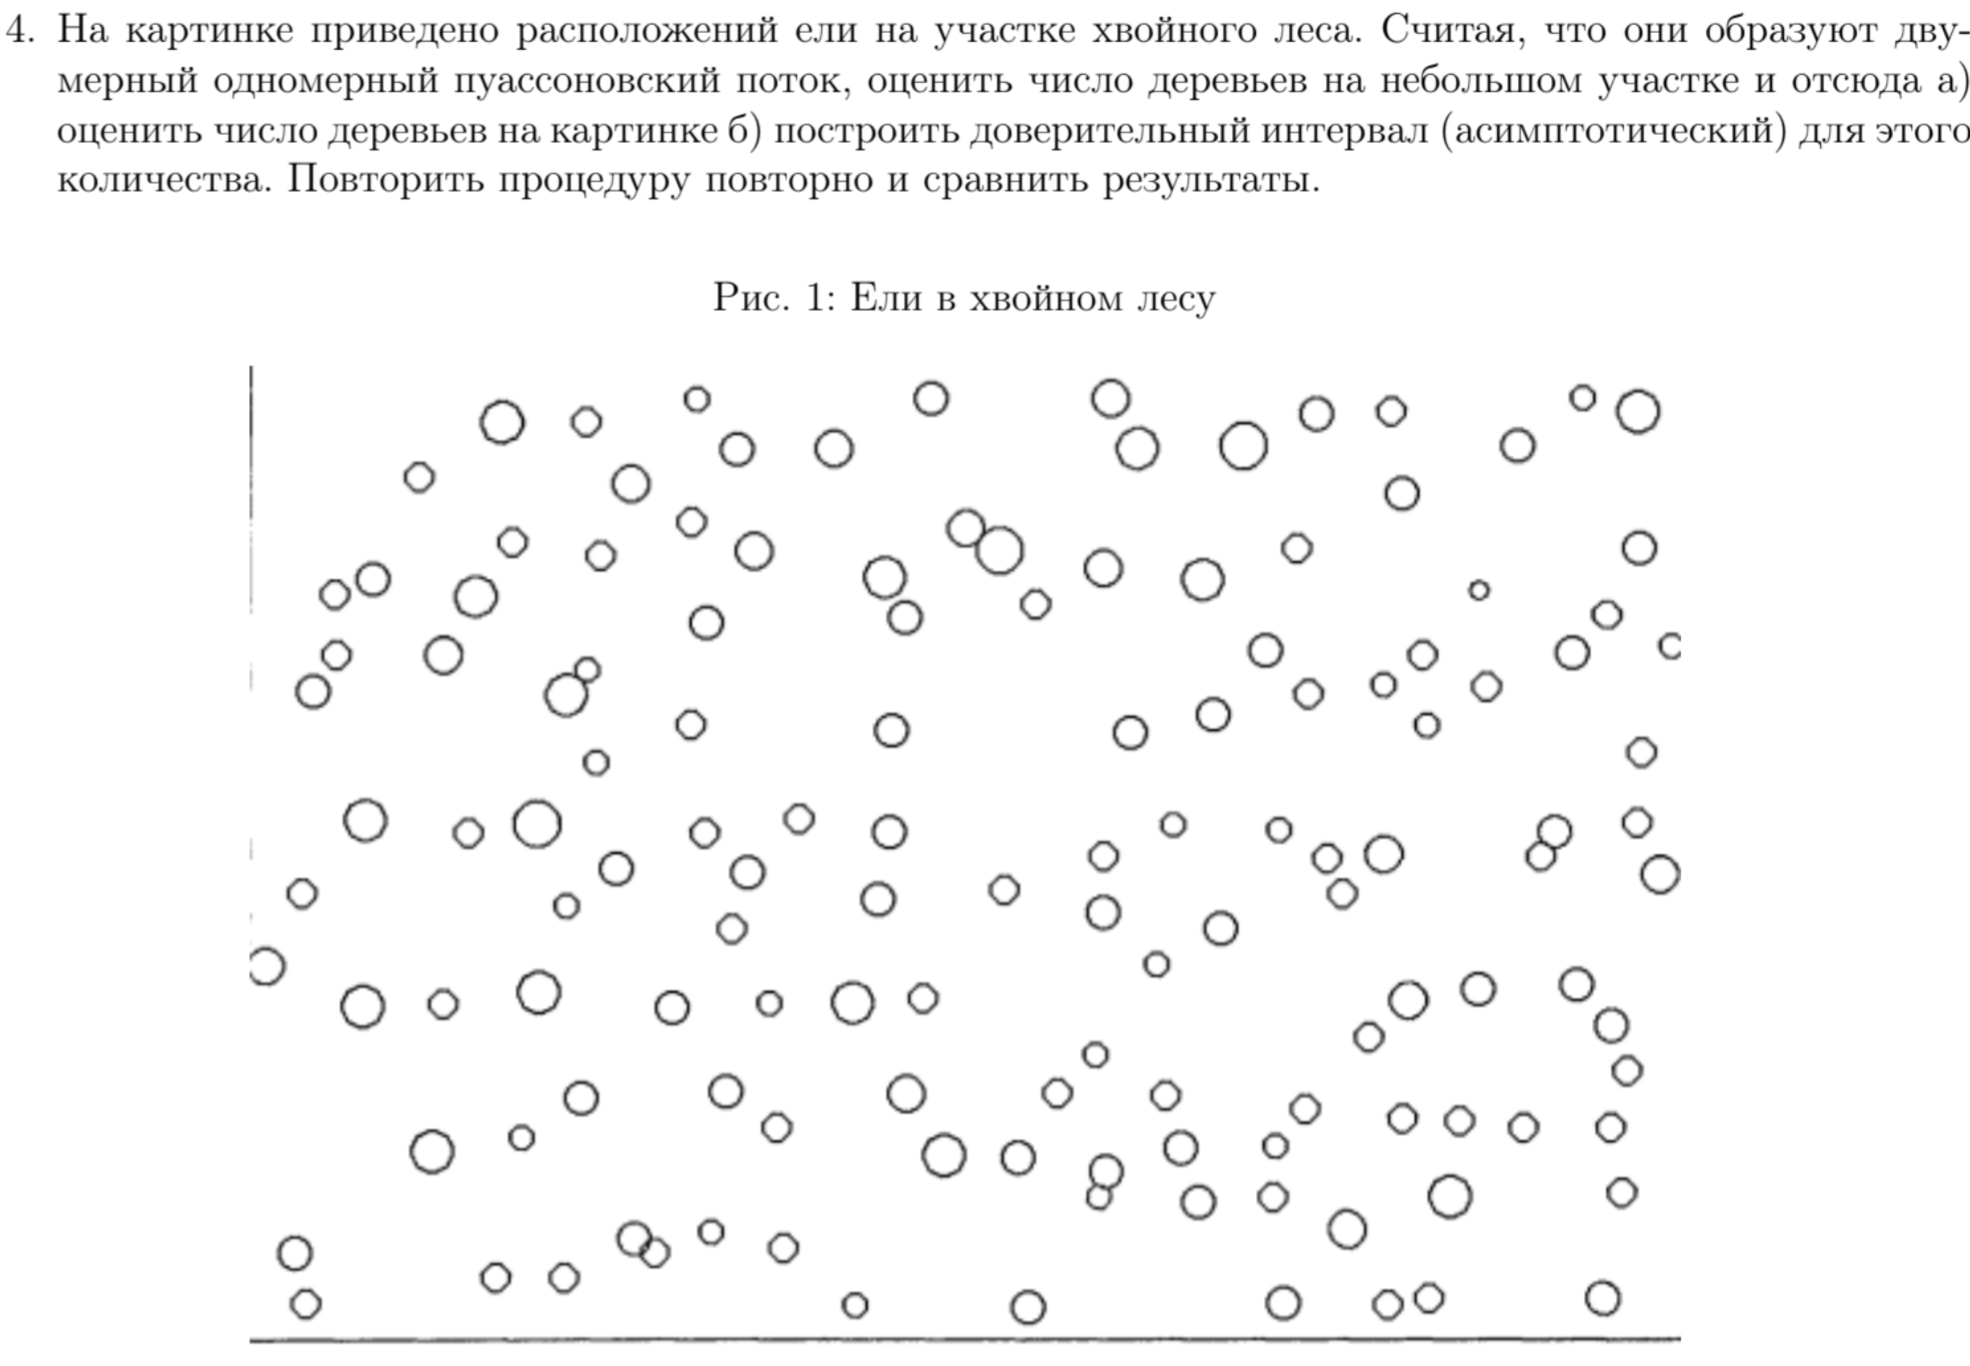

In [4]:
# I область
S1 = 34
b = sts.norm.ppf(1 - 0.05/2)
a = sts.norm.ppf(0.05/2)
S = 4 * S1
def calc(S):
    conf = np.array([S - b*np.sqrt(S), S - a * np.sqrt(S)])
    print(f"Approx num: {S}")
    print(f"Conf interval: {conf}")
calc(S)

Approx num: 136
Conf interval: [113.14308858 158.85691142]


In [5]:
# II область
S2 = 31
calc(31*4)

Approx num: 124
Conf interval: [102.17476475 145.82523525]


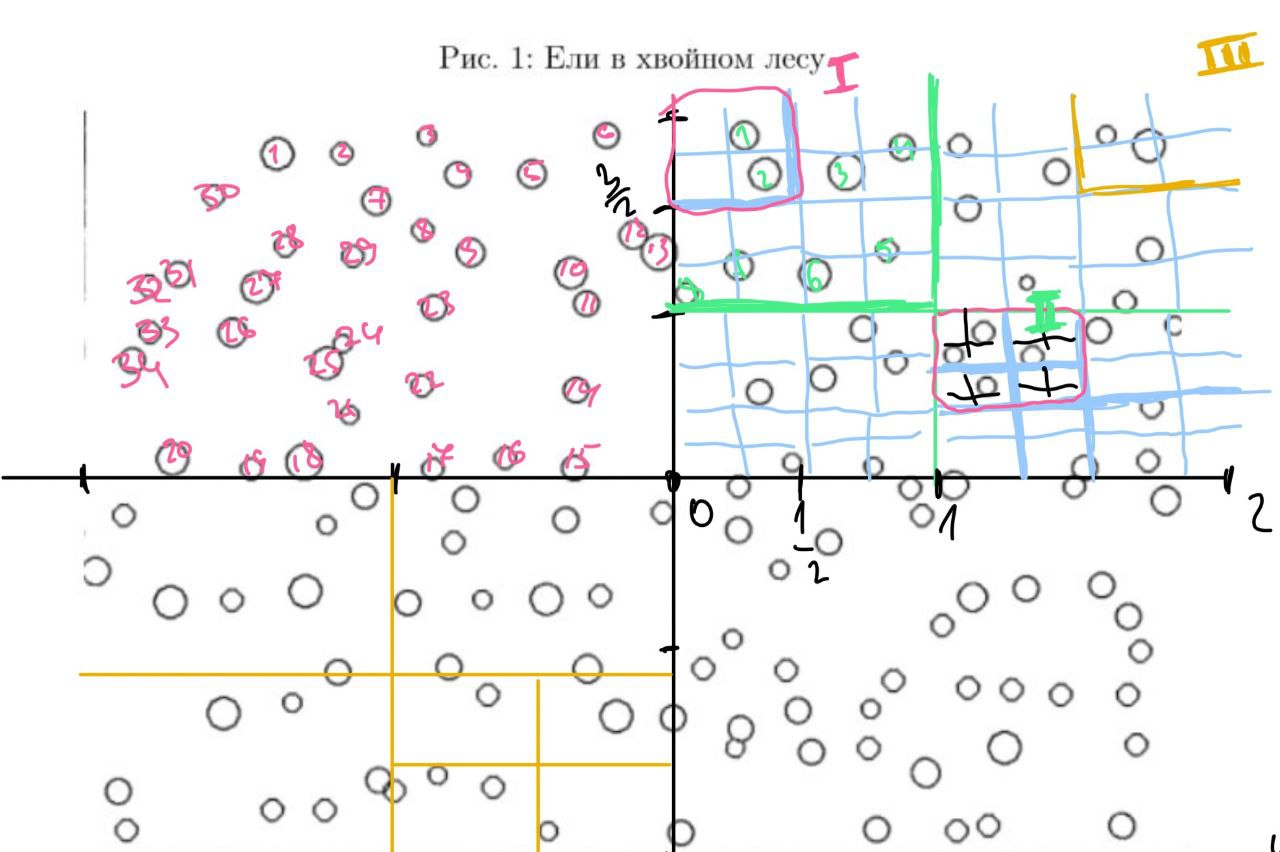

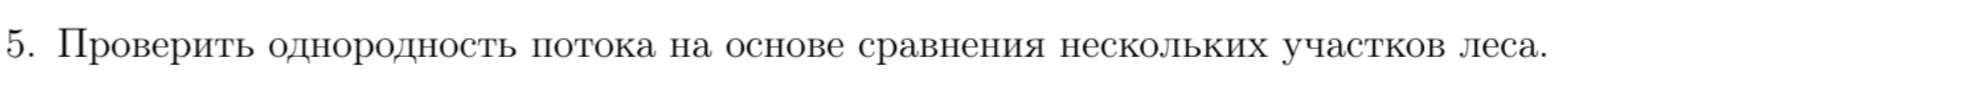

In [67]:
num_zeros = 1000
arr1 = np.concatenate((np.zeros(num_zeros), np.ones(34)))
arr2 = np.concatenate((np.zeros(num_zeros),np.ones(31)))
print(f"t-test pvalue {sts.ttest_ind(arr1, arr2).pvalue}")
print(f"kruskal pvalue {sts.kruskal(arr1, arr2).pvalue}")
# def get_pval(num_zeros):
#     arr1 = np.concatenate((np.zeros(num_zeros), np.ones(32)))
#     arr2 = np.concatenate((np.zeros(num_zeros),np.ones(33)))
#     return sts.kruskal(arr1, arr2).pvalue
# num = np.arange(50, 5000, 200)
# plt.plot(num, np.vectorize(get_pval)(num))
# np.vectorize(get_pval)(num)

t-test pvalue 0.7143758114611503
kruskal pvalue 0.7142809631435572
